# 1) Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
import pickle
from scipy import stats
%matplotlib inline

# 2) Loading The Data Into A Dataframe

## 2.1) Description of dataset
Source : http://lib.stat.cmu.edu/datasets/boston

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

In [2]:
#loading data from csv into a dataframe
boston_ds = pd.read_csv("dataset/BostonHousing.csv")

# 3) Basic Data Information

In [3]:
boston_ds.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston_ds.shape

(506, 14)

### Observation:</br>
- Attributes : crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat</br>
- Target Variable : medv<br>
- There are 14 columns and 506 rows in the given dataset 

In [5]:
# To check if there are any null/missing values
boston_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# Stastical Summary of dataset
boston_ds.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#Checking for missing values
boston_ds.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### Observation:<br>
- There are no null/missing values in the given dataset.<br>
- chas, rad and tax are the only two attributes which are integers rest all are float.<br>
- Column 'zn' (proportion of residential land zoned for lots over 25,000 sq.ft.) has 0 for 25th and 50th percentiles.<br>
- Column 'chas' (Charles River dummy variable 1: 1 if tract bounds over river and 0 otherwise) has 0 for 25th, 50th and 75th percentiles.<br>
- For column 'zn' and 'chas' the above 2 observations can be understood as the variables are conditional + categorical variable.<br>
- Initial plan seems to favour the idea that these columns might not be useful in regression task of predicting 'medv'(Median Value of owner occupied homes).<br>
- The maximumm value of column 'medv' is interesting as according to data description it appears to be censored at 50.0(which corresponds to a median price of 50,000$), so on this basis values above 50.0 might not help in predicting 'medv'.

# 4) Exploratory Data Analysis

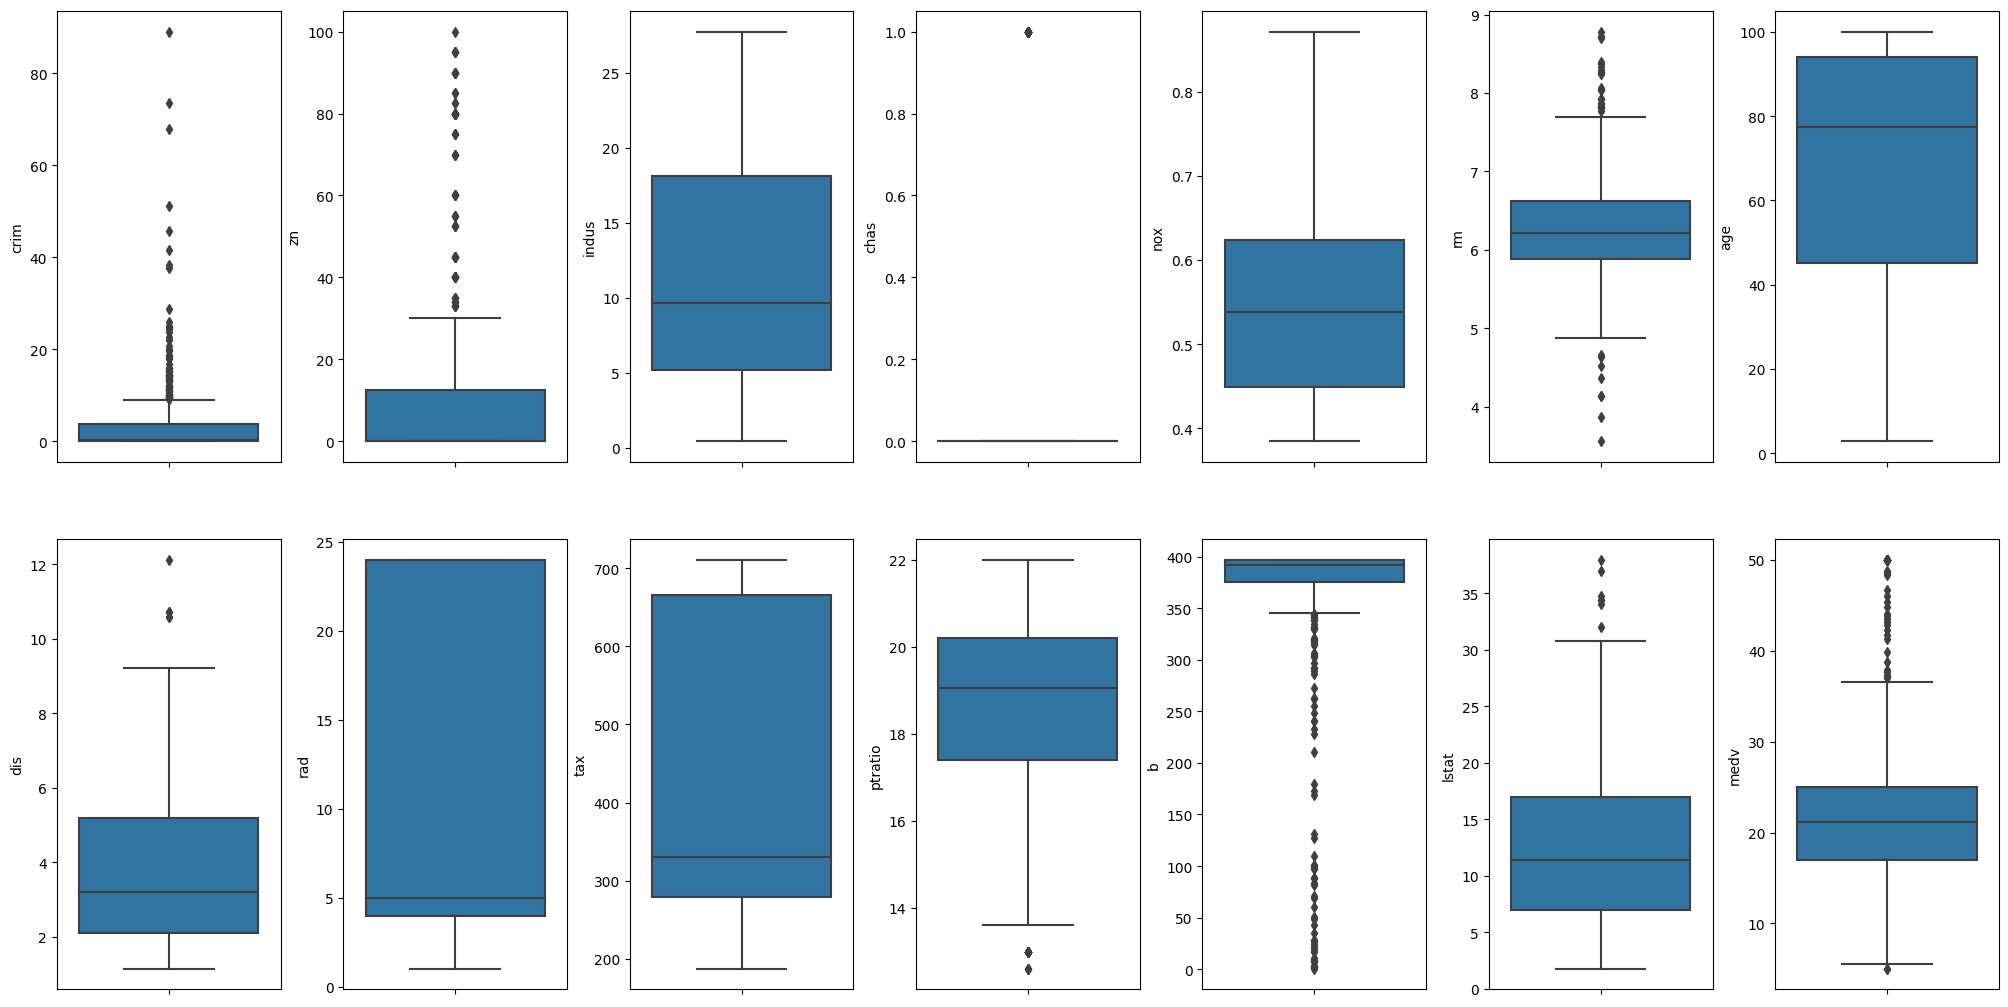

In [8]:
# Plotting Box plots to visualize each column in order to identify outliers (if any)
fig,axs = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in boston_ds.items():
    sns.boxplot(y=k, data = boston_ds, ax = axs[index])
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Observation:
- The following columns have outliers: crim, zn, rm, b, medv<br>
- Before dealing with outliers we need to see what percent of them are actually present in the data

In [9]:
# Code to find percentage of outliers in each column
for i,j in boston_ds.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    iqr = q3 - q1 # Inter Quartile Range
    v_col = j[(j <= q1 - 1.5 * iqr) | (j >= q3 + 1.5 * iqr)]
    percent = np.shape(v_col)[0] * 100 / np.shape(boston_ds)[0]
    print("%s outlier = %.2f%%" % (i.upper(),percent))

CRIM outlier = 13.04%
ZN outlier = 13.44%
INDUS outlier = 0.00%
CHAS outlier = 100.00%
NOX outlier = 0.00%
RM outlier = 5.93%
AGE outlier = 0.00%
DIS outlier = 0.99%
RAD outlier = 0.00%
TAX outlier = 0.00%
PTRATIO outlier = 2.96%
B outlier = 15.22%
LSTAT outlier = 1.38%
MEDV outlier = 7.91%


### Observation:
- The above cell provides information about what percent of column data is outlier.<br>
- The target variable is 'medv', so we remove outlier from this column so we can have best predictions later on.

In [10]:
# Removing outliers from 'medv' column
boston_ds = boston_ds[~(boston_ds['medv'] >= 50.0)]
print(np.shape(boston_ds))

(490, 14)


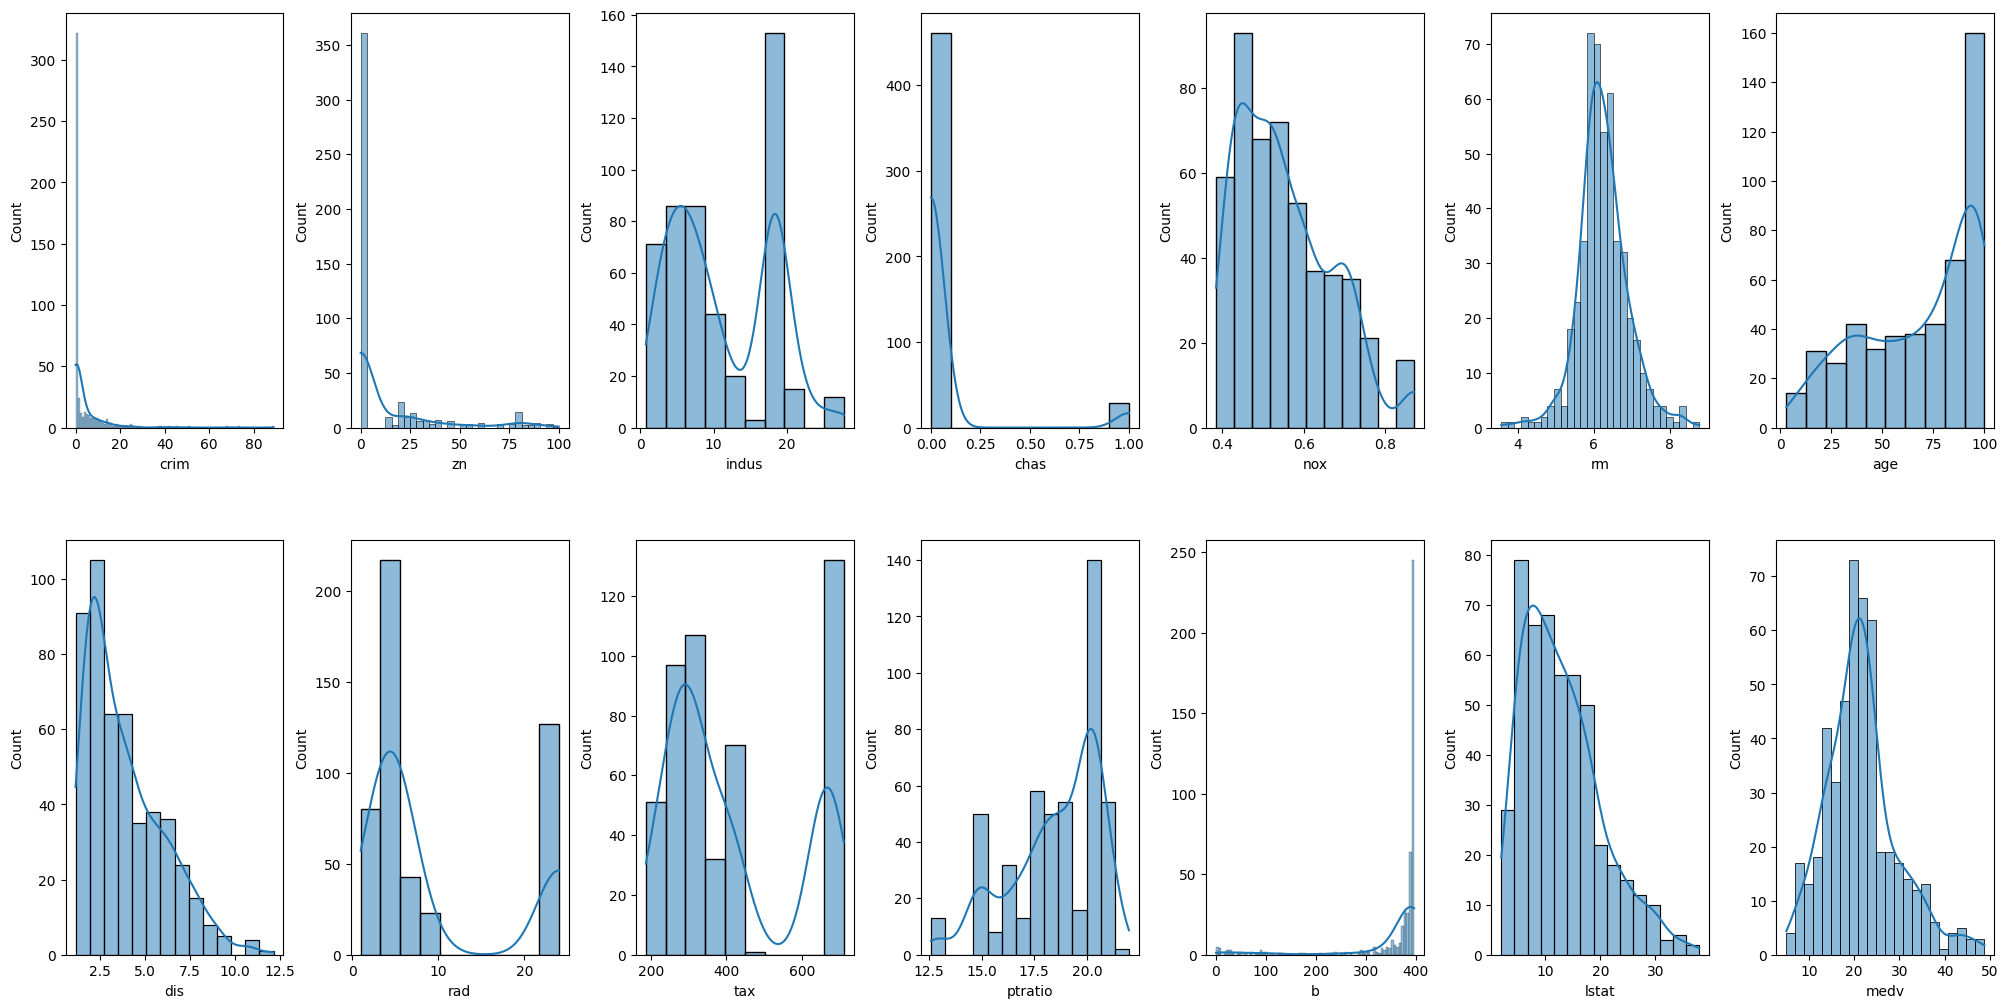

In [11]:
# After removing 'medv' outliers code snippet to view the current status of all the parameters
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_ds.items():
    sns.histplot(v, ax=axs[index],kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Observation:
- crim, zn, b are highly skewed distributions.<br>
- 'medv' now has a near normal distribution.<br>
- Other parameters seem to have a normal or bimodel distribution except for 'chas' which is a discrete variable.<br>

<AxesSubplot:>

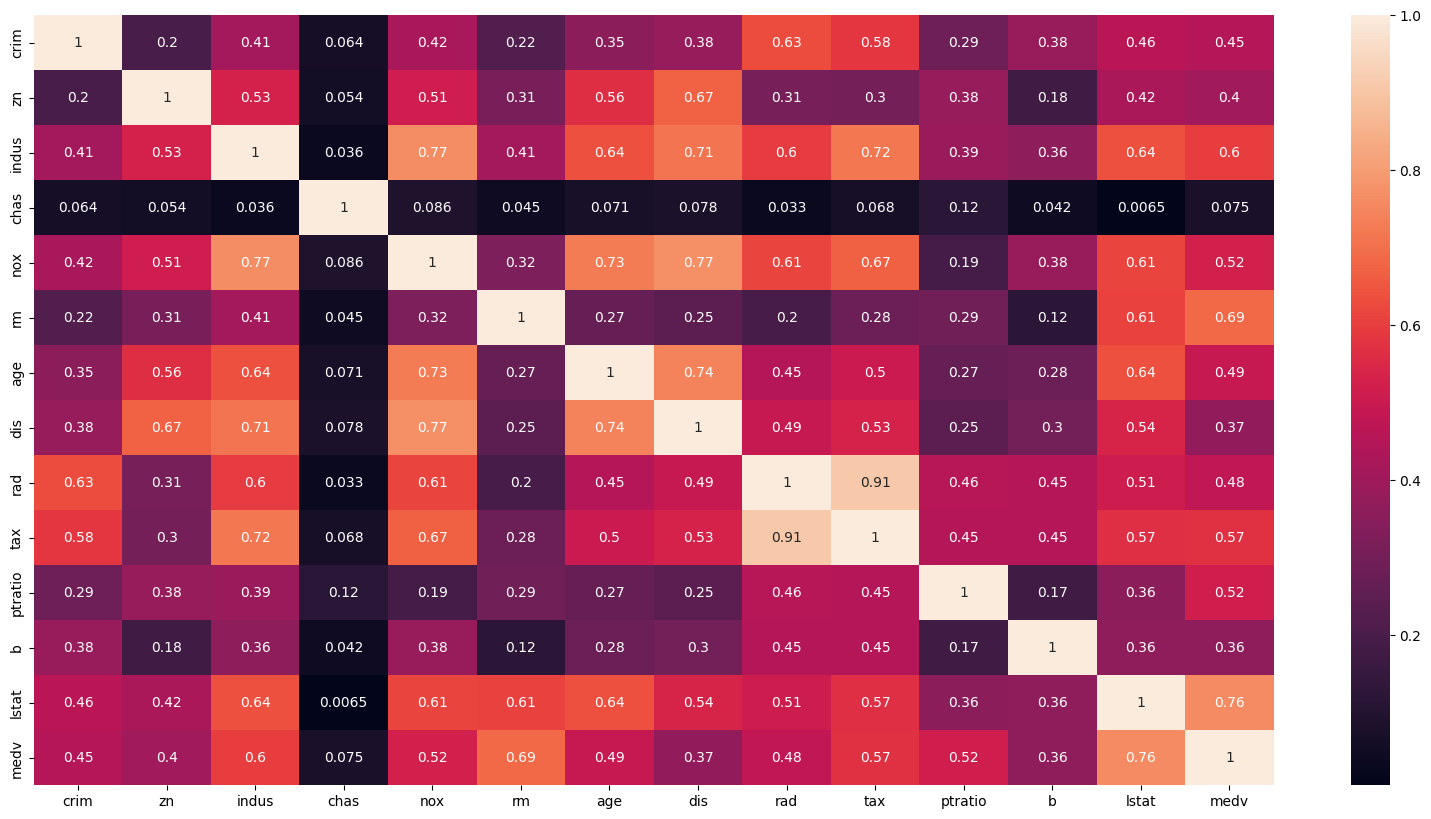

In [12]:
# Pair wise correlation between all the parameters using heat map
plt.figure(figsize=(20, 10))
sns.heatmap(boston_ds.corr().abs(),  annot=True) #boston_ds.corr() By default it gives pearson correlation

### Observation:
- 'tax' and 'rad' are highly correlated features.<br>
- Following columns: lstat, indus, rm, tax, nox, ptratio; have a good correlation score with 'medv' being >0.5 which makes them good parameters to be used for predictions.<br>

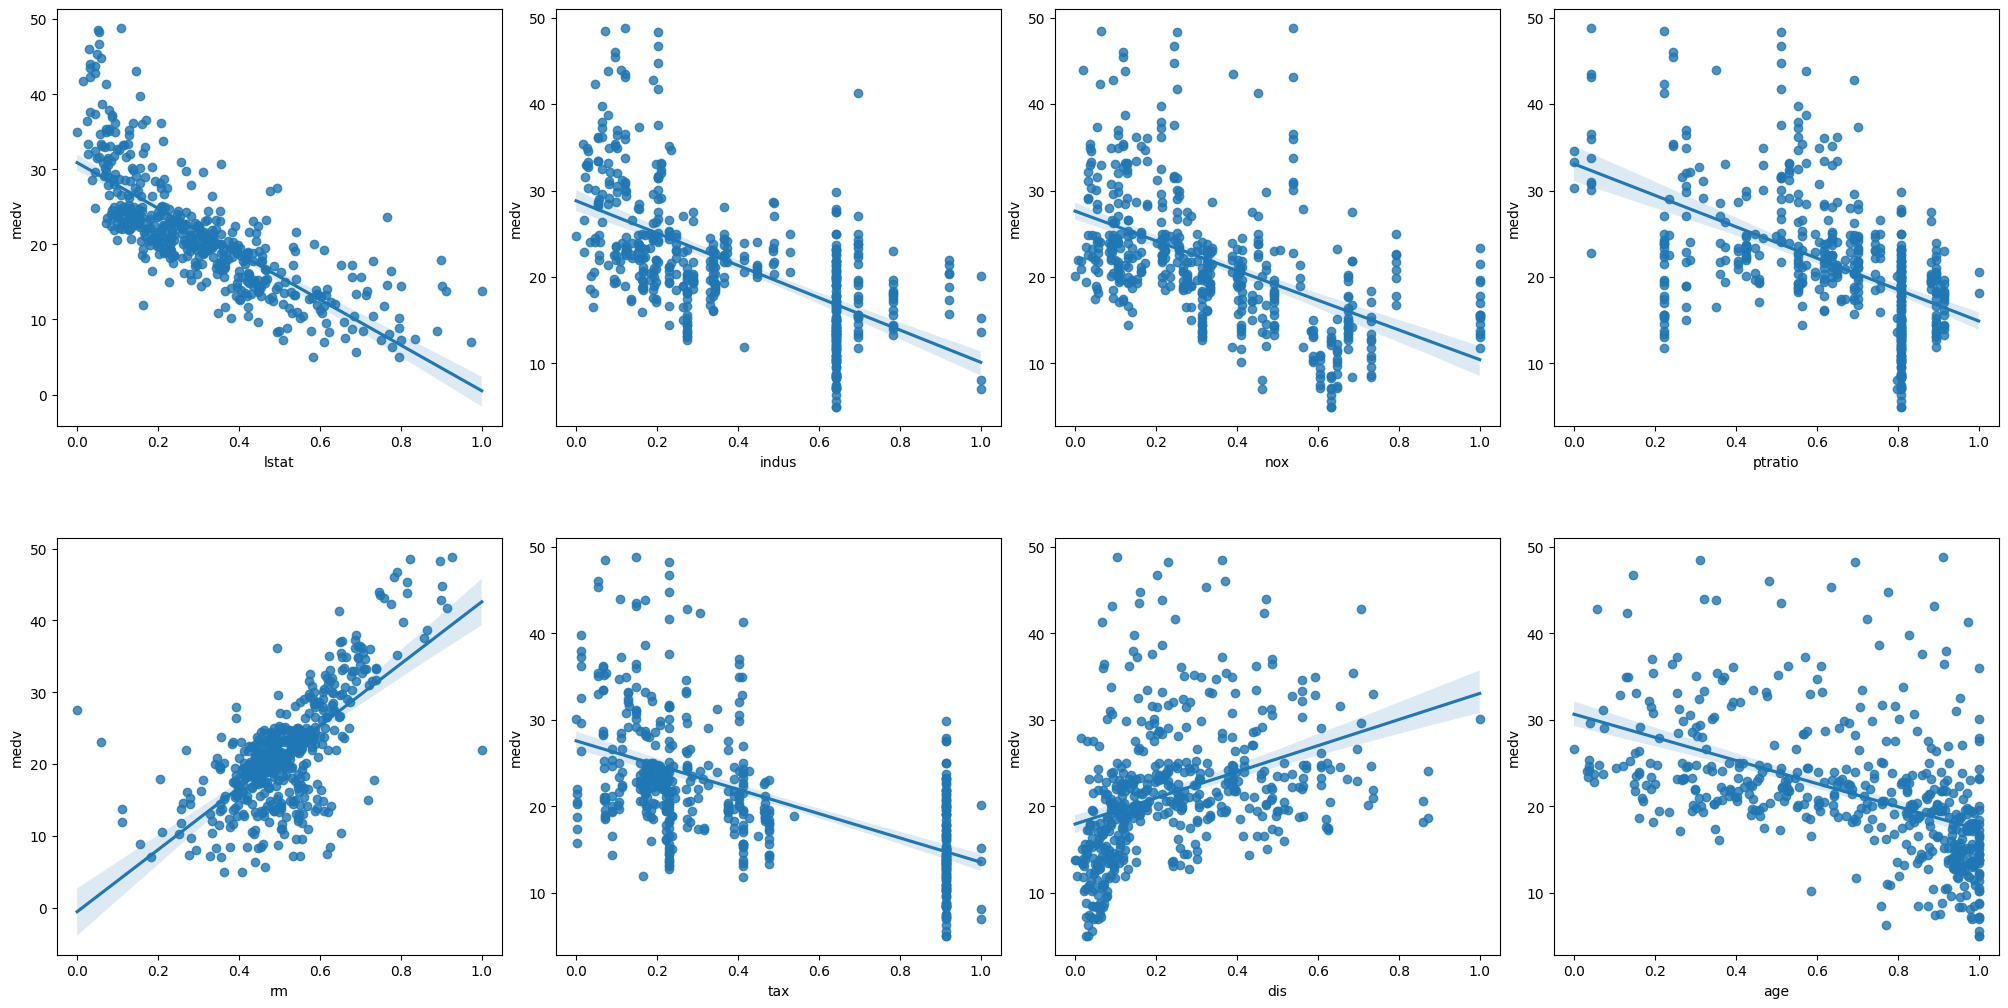

In [13]:
# Code snippet to look at the possible regressiion line that we can get while training the model
# scaling the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age']
x = boston_ds.loc[:,column_sels]
y = boston_ds['medv']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Observation: 
- From the above graphs we can try to predict 'medv' with the following: lstat, indus, nox, ptratio, rm, tax, dis, age

In [14]:
# Removing the skewness of data using log transformation
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

# 5) Model Training

In [15]:
# # Independent and dependent features
# x = boston_ds.iloc[:,:-1]
# y = boston_ds.iloc[:,-1]

In [16]:
# x.head()

In [17]:
# y

In [18]:
# Train test Split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(x.values,y,test_size=0.3,random_state=42)

In [19]:
X_Train

array([[0.50776454, 0.4965013 , 0.4730853 , ..., 0.6492591 , 0.06025254,
        0.64461445],
       [0.02632453, 0.05195974, 0.13994085, ..., 0.06465779, 0.37030294,
        0.36590105],
       [0.14965522, 0.03458033, 0.052116  , ..., 0.35591129, 0.62654335,
        0.14898805],
       ...,
       [0.26007469, 0.4965013 , 0.58343335, ..., 0.6492591 , 0.11765462,
        0.59189767],
       [0.36299005, 0.4965013 , 0.51575174, ..., 0.6492591 , 0.10512663,
        0.68383516],
       [0.2153892 , 0.25435507, 0.24512246, ..., 0.31914745, 0.13414997,
        0.61499078]])

In [20]:
Y_Train.head()

416    2.140066
3      3.538057
352    2.975530
462    3.020425
60     2.980619
Name: medv, dtype: float64

In [21]:
X_Test

array([[0.37069129, 0.4965013 , 0.33735368, ..., 0.6492591 , 0.14944554,
        0.53141549],
       [0.19250387, 0.13005313, 0.12370965, ..., 0.1084093 , 0.28626381,
        0.38149314],
       [0.35736934, 0.4965013 , 0.51575174, ..., 0.6492591 , 0.10253474,
        0.65429715],
       ...,
       [0.20593605, 0.20580899, 0.12188982, ..., 0.08414468, 0.30796499,
        0.27628889],
       [0.12028061, 0.2422197 , 0.27369583, ..., 0.20620704, 0.26688632,
        0.24049978],
       [0.30387425, 0.4965013 , 0.33735368, ..., 0.6492591 , 0.14278595,
        0.44087599]])

In [22]:
Y_Test.head()

468    3.000720
84     3.214868
450    2.667228
489    2.079442
444    2.468100
Name: medv, dtype: float64

In [23]:
# Standardizing the dataset
scaler = StandardScaler()

In [24]:
X_Train = scaler.fit_transform(X_Train)

In [25]:
X_Test = scaler.transform(X_Test)

In [26]:
# Saving the standardized data set
pickle.dump(scaler,open('scaling.pkl','wb'))

In [27]:
regression=LinearRegression()

In [28]:
regression.fit(X_Train,Y_Train)

LinearRegression()

In [29]:
print(regression.coef_)

[-0.19912959  0.00158564 -0.07755629 -0.066575    0.05467565 -0.06173705
 -0.0852822  -0.00676914]


In [30]:
print(regression.intercept_)

3.0787747704028403


In [31]:
#On which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [32]:
# Prediction with test data
reg_pred = regression.predict(X_Test)

In [33]:
reg_pred

array([2.75295479, 3.25132555, 2.77945617, 2.5904572 , 2.55581021,
       3.04584671, 2.69822553, 3.57254567, 2.94094039, 3.33847181,
       2.94996746, 3.01673889, 2.34852355, 2.7782438 , 2.69947237,
       3.32446659, 2.73399428, 2.75618696, 2.87151611, 3.02707141,
       3.08681819, 3.20148408, 2.59482331, 3.4152215 , 3.13498488,
       3.1796233 , 2.99520781, 3.55752108, 3.5837003 , 2.67877302,
       3.24263555, 2.7762043 , 3.30487307, 3.2284625 , 2.82049895,
       3.2839274 , 3.45084826, 3.06863404, 3.46840179, 3.38593356,
       2.67964813, 2.83760825, 2.65671953, 2.94891166, 3.00206608,
       3.35414272, 2.99670294, 2.75585392, 2.99324018, 2.96477578,
       2.72220528, 3.4459269 , 3.39300189, 3.07189689, 3.00264321,
       3.33586826, 2.78343387, 3.38488889, 3.1391262 , 2.61045855,
       3.19198546, 2.75824232, 3.11948316, 3.20272221, 3.22317057,
       3.69247587, 3.3218506 , 3.35296782, 2.68700292, 2.94415195,
       2.74088109, 3.06666063, 2.95488014, 2.9502242 , 2.77506

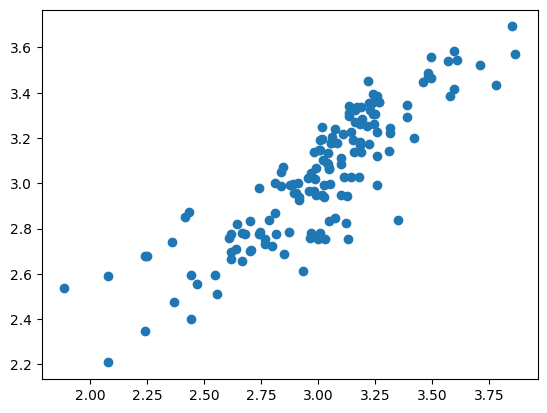

In [34]:
# Scatter plot for prediction
plt.scatter(Y_Test,reg_pred)

In [35]:
# Error
residuals = Y_Test - reg_pred

In [36]:
residuals

468    0.247765
84    -0.036458
450   -0.112228
489   -0.511016
444   -0.087711
         ...   
5      0.044969
116   -0.010661
45    -0.182692
16     0.014073
469    0.216529
Name: medv, Length: 147, dtype: float64

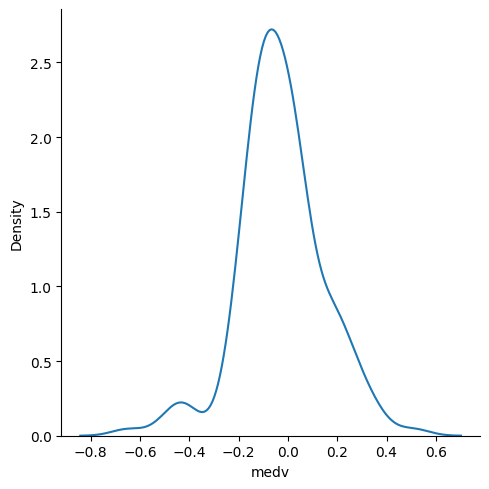

In [37]:
#plotting the residuals
sns.displot(residuals,kind="kde")

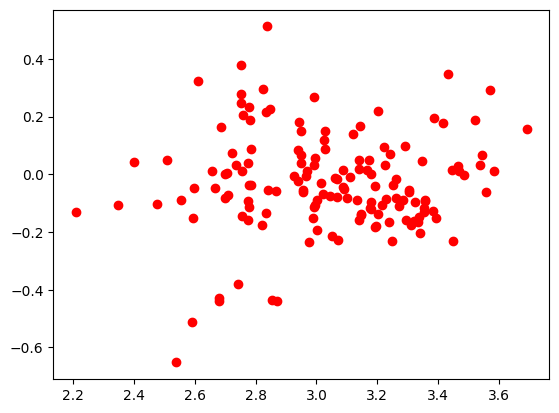

In [38]:
# Scatter plot between prediction and residuals
plt.scatter(reg_pred,residuals,c="red")

In [39]:
# Performance metrics for the model
print(mean_absolute_error(Y_Test,reg_pred))
print(mean_squared_error(Y_Test,reg_pred))
print(np.sqrt(mean_squared_error(Y_Test,reg_pred)))

0.12942989051963313
0.03000720405129047
0.17322587581331628


## R square and adjusted R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [40]:
score = r2_score(Y_Test,reg_pred)
score

0.7479811046367824

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [41]:
#display adjusted R-squared
1 - (1-score)*(len(Y_Test)-1)/(len(Y_Test)-X_Test.shape[1]-1)

0.7333713136012335

# 6) New Data Prediction

In [42]:
X_Test[0].reshape(1,-1)

array([[ 0.80485126,  1.0396362 ,  0.3040743 ,  0.8067484 , -0.51948971,
         1.50989626, -0.38402303,  0.15318989]])

In [43]:
scaler.transform(X_Test[0].reshape(1,-1))

array([[ 3.73737869,  4.01181575,  0.11104332,  2.19333432, -8.00817231,
         5.53262557, -3.97160764, -1.87121959]])

In [44]:
regression.predict(scaler.transform(X_Test[0].reshape(1,-1)))

array([1.758234])

# 7) Pickling the model file for deployment

In [45]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [46]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [47]:
pickled_model.predict(scaler.transform(X_Test[0].reshape(1,-1)))

array([1.758234])